# Bike Sharing Case Study for BOOMBIKES

### Importing the libraries

In [1]:
import pandas as pd,numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
df = pd.read_csv('day.csv')
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


(730, 16)

In [4]:
#checking for null values 
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
df.drop_duplicates(subset=None, inplace=True)
df.shape

(730, 16)

### Data cleaning

In [6]:
#instant seems like Sno
#dteday or month/year is much the same
#cnt = casual + registered 
# Dropping these columns

In [7]:
df=df.drop(labels=['instant', 'dteday', 'casual', 'registered'], axis=1)

In [8]:
#We have to understand the working day, weekday, holiday, yr,season variables
print(df.yr.value_counts())
print(df.season.value_counts())
print(df.mnth.value_counts())

1    365
0    365
Name: yr, dtype: int64
3    188
2    184
1    180
4    178
Name: season, dtype: int64
12    62
10    62
8     62
7     62
5     62
3     62
1     62
11    60
9     60
6     60
4     60
2     56
Name: mnth, dtype: int64


In [9]:
#For Building a model, it is necessary that we convert the categorical into numerical or binary data.
#The year variable is already as 0 and 1
#Creating dummies for season and month
#month = pd.get_dummies(df['mnth'], drop_first=True)
month=pd.get_dummies(df['mnth'], prefix="mnth", prefix_sep='_')
season=pd.get_dummies(df['season'], prefix="season", prefix_sep='_')
weather=pd.get_dummies(df['weathersit'], prefix="weathersit", prefix_sep='_')
weekday=pd.get_dummies(df['weekday'], prefix="wkday", prefix_sep='_',drop_first=True)
month

,mnth_1,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12
0,1,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
725,0,0,0,0,0,0,0,0,0,0,0,1
726,0,0,0,0,0,0,0,0,0,0,0,1
727,0,0,0,0,0,0,0,0,0,0,0,1
728,0,0,0,0,0,0,0,0,0,0,0,1


In [10]:
#adding the dummies to our dataframe
df=pd.concat([df,month,season,weather,weekday],axis=1)

In [11]:
df.head(5)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,season_4,weathersit_1,weathersit_2,weathersit_3,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,...,0,1,0,0,1,0,0,0,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,...,0,1,0,0,0,1,0,0,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,...,0,1,0,0,0,0,1,0,0,0


### Visualization of Numerical Data

<Figure size 1008x288 with 0 Axes>

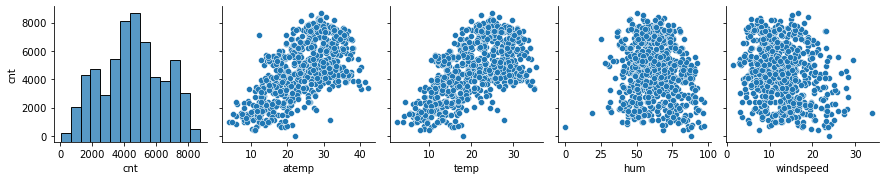

In [12]:
plt.figure(figsize=(14,4))
sns.pairplot(data=df, x_vars=['cnt', 'atemp', 'temp', 'hum', 'windspeed'], y_vars='cnt')

### Inferences on numerical data
1. Atemp and temp give a linear behaviour
2. humidity & windspeed donot exhibit much linear relation ship

<AxesSubplot:xlabel='workingday', ylabel='cnt'>

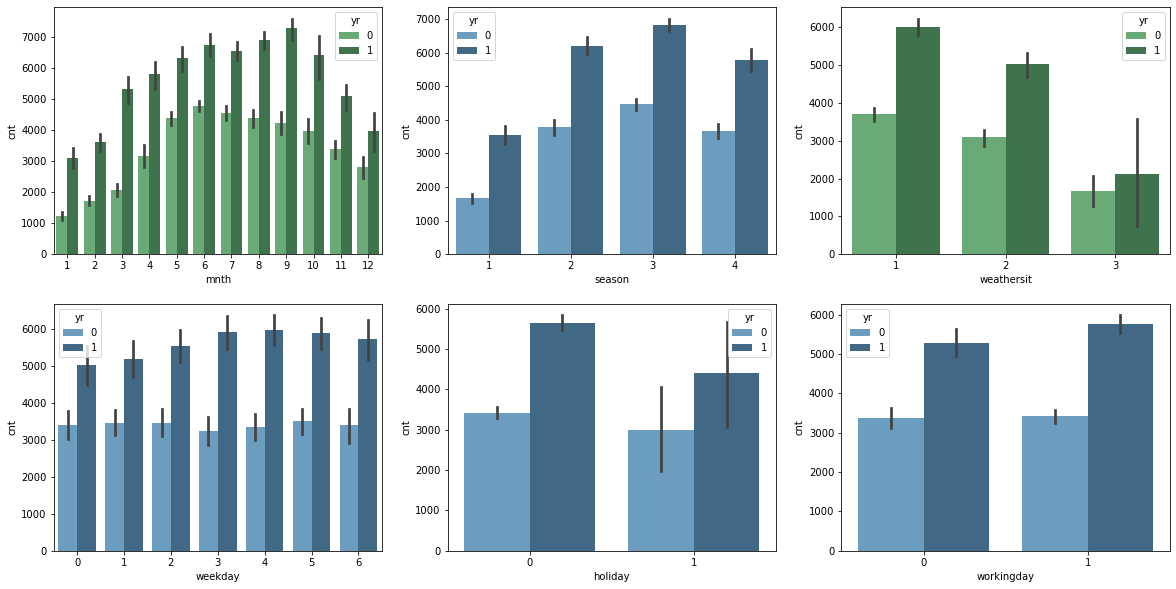

In [13]:
plt.subplots(2, 2, figsize=(20, 10))
plt.subplot(2,3,1)
sns.barplot(x='mnth', y='cnt',hue='yr', palette="Greens_d", data=df)
plt.subplot(2,3,2)
sns.barplot(x='season', y='cnt',hue='yr', palette="Blues_d", data=df)
plt.subplot(2,3,3)
sns.barplot(x='weathersit', y='cnt',hue='yr', palette="Greens_d", data=df)
plt.subplot(2,3,4)
sns.barplot(x='weekday', y='cnt',hue='yr', palette="Blues_d", data=df)
plt.subplot(2,3,5)
sns.barplot(x='holiday', y='cnt',hue='yr', palette="Blues_d", data=df)
plt.subplot(2,3,6)
sns.barplot(x='workingday', y='cnt',hue='yr', palette="Blues_d", data=df)


#### Inferences from Categorical Visualizations
1. Month has considerable Bike usage increase in Q2 and decline in other quarters
2. Season 3 has higher Bike usage
3. Weathersit "1" (clear weather) is much preferred
4. Weekday has no change in year 2018, but weekday has very little high in 3rd and 4th
5. Holiday has not much pattern
6. Working day not much pattern

In [14]:
#Dropping the variables which have dummies created
df=df.drop(labels=['mnth', 'season', 'weathersit', 'weekday', 'workingday'], axis=1)

##### Finding the independent variables and observing multicollieanrity from heatmap

<AxesSubplot:>

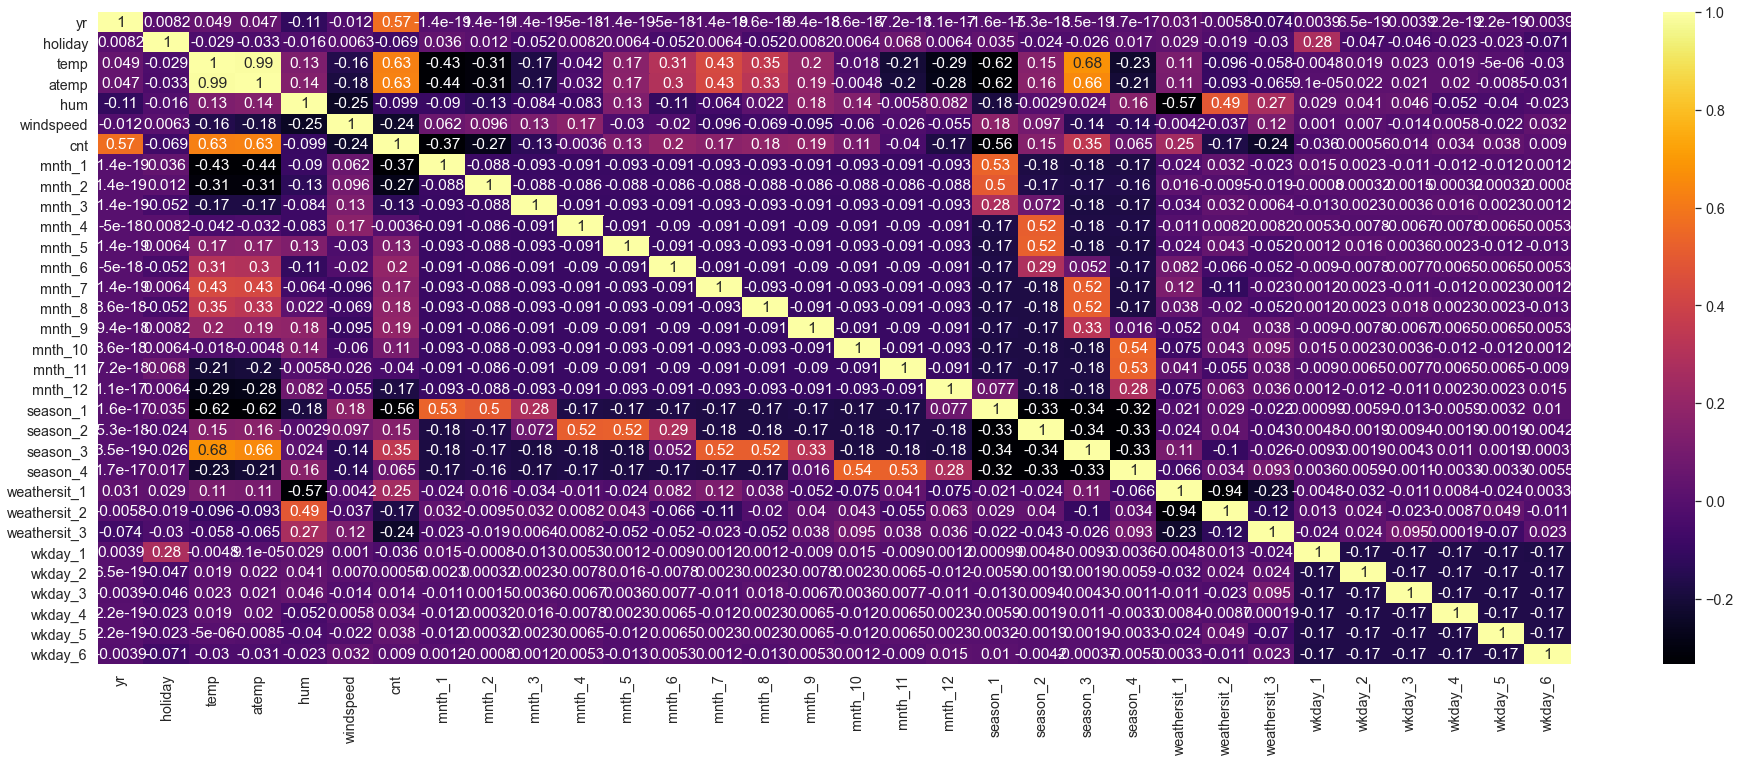

In [15]:
plt.figure(figsize=(33,12))
sns.set(font_scale=1.3)
sns.heatmap(df.corr(), annot=True,cmap="inferno", robust=True)

###### Heat map inferences
1. Count has high positive correlations with year,temp/atemp and season 3
2. Count has high negative correlation with hum, windspeed, weathersit_2,3, season1.
3. windspeed has -ve correlation with temp/atemp/hum
4. season_3& 4 has -ve correlation with windspeed
5. temp increases slowly from mnth 5 to mnth 10. but drops in Q4 and Q1 which is an expected pattern
6. hum has -ve correlation with weathersit_1, we can say hum can be best explained by weathersit_1,2,3.

## Linear Regression 

In [16]:
import statsmodels
import statsmodels.api as sm
import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler


###### SCALING

In [17]:
scaler = MinMaxScaler()

In [18]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
df_train=df
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,temp,atemp,hum,windspeed,cnt,mnth_1,mnth_2,mnth_3,...,season_4,weathersit_1,weathersit_2,weathersit_3,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6
0,0,0,0.355170,0.373517,0.828620,0.284606,0.110792,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0.379232,0.360541,0.715771,0.466215,0.089623,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0.171000,0.144830,0.449638,0.465740,0.152669,1,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,0.175530,0.174649,0.607131,0.284297,0.177174,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0.209120,0.197158,0.449313,0.339143,0.181546,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [19]:
df_train.describe()

,yr,holiday,temp,atemp,hum,windspeed,cnt,mnth_1,mnth_2,mnth_3,...,season_4,weathersit_1,weathersit_2,weathersit_3,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.543852,0.519090,0.645400,0.346568,0.516108,0.084932,0.076712,0.084932,...,0.243836,0.634247,0.336986,0.028767,0.143836,0.142466,0.141096,0.142466,0.142466,0.143836
std,0.500343,0.167266,0.228140,0.213968,0.146402,0.159873,0.222735,0.278971,0.266317,0.278971,...,0.429689,0.481971,0.473004,0.167266,0.351164,0.349767,0.348359,0.349767,0.349767,0.351164
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.346084,0.339611,0.534704,0.232045,0.362143,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,0.548307,0.535942,0.643959,0.326928,0.520766,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.743261,0.695494,0.750535,0.434629,0.683847,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [20]:
y=df.pop('cnt')
X=df
X.head(5)

,yr,holiday,temp,atemp,hum,windspeed,mnth_1,mnth_2,mnth_3,mnth_4,...,season_4,weathersit_1,weathersit_2,weathersit_3,wkday_1,wkday_2,wkday_3,wkday_4,wkday_5,wkday_6
0,0,0,0.355170,0.373517,0.828620,0.284606,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0.379232,0.360541,0.715771,0.466215,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0.171000,0.144830,0.449638,0.465740,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
3,0,0,0.175530,0.174649,0.607131,0.284297,1,0,0,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0.209120,0.197158,0.449313,0.339143,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


######  STEPS FOR BUILDING  A PREDICTION LINEAR REGRESSION MODEL
1.Create Train and test sets after Scaling the data

2.Train your data for 70-30

3.Get beta coefficients

4.Check the significance of the features

5.Check the assumption of linear regression are valid for our model

6.Predict the Test set using the final model

7.Evaluate test dataset

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.70, random_state=100)

In [22]:
print(X_train.shape)
print(X_test.shape)

(510, 31)
(220, 31)


In [23]:
#Creating a constant 
X_train_sm = sm.add_constant(X_train)
#OLS uses the Ordinary least square method for our model
lr = sm.OLS(y_train,X_train_sm)
#Fits the model for equation : y = mX + C
lr_mdl = lr.fit()

In [24]:
lr_mdl.params

const           0.124870
yr              0.232539
holiday        -0.085381
temp            0.387984
atemp           0.059045
hum            -0.152342
windspeed      -0.191464
mnth_1         -0.047468
mnth_2         -0.016720
mnth_3          0.017150
mnth_4          0.015596
mnth_5          0.041136
mnth_6          0.021608
mnth_7         -0.017061
mnth_8          0.037866
mnth_9          0.102356
mnth_10         0.023309
mnth_11        -0.024223
mnth_12        -0.028679
season_1       -0.040161
season_2        0.047563
season_3        0.005194
season_4        0.112274
weathersit_1    0.146455
weathersit_2    0.086935
weathersit_3   -0.108520
wkday_1         0.033691
wkday_2         0.036876
wkday_3         0.049418
wkday_4         0.045585
wkday_5         0.055315
wkday_6         0.054219
dtype: float64

In [25]:
lr_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.81e-180
Time:                        21:52:24   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1249      0.023      5.474      0.000       0.080       0.170
yr               0.2325      0.008     28.794      0.000       0.217       0.248
holiday         -0.0854      0.027     -3.196      0.001      -0.138      -0.033
temp             0.3880      0.142      2.727      0.007       0.108       0.668
atemp            0.0590      0.138      0.426      0.670      -0.213       0.331
hum             -0.1523      0.039     -3.938      0.000      -0.228      -0.076
windspeed       -0.1915      0.028     -6.962      0.000      -0.246      -0.137
mnth_1          -0.0475      0.024     -1.978      0.049      -0.095      -0.000
mnth_2          -0.0167      0.023     -0.717      0.474      -0.063       0.029
mnth_3           0.0172      0.017      1.019      0.309      -0.016       0.050
mnth_4           0.0156      0.021      0.744      0.457      -0.026       0.057
mnth_5           0.0411      0.022      1.881      0.061      -0.002       0.084
mnth_6           0.0216      0.021      1.021      0.308      -0.020       0.063
mnth_7          -0.0171      0.026     -0.665      0.507      -0.067       0.033
mnth_8           0.0379      0.024      1.588      0.113      -0.009       0.085
mnth_9           0.1024      0.020      5.218      0.000       0.064       0.141
mnth_10          0.0233      0.022      1.048      0.295      -0.020       0.067
mnth_11         -0.0242      0.023     -1.054      0.292      -0.069       0.021
mnth_12         -0.0287      0.020     -1.432      0.153      -0.068       0.011
season_1        -0.0402      0.017     -2.387      0.017      -0.073      -0.007
season_2         0.0476      0.017      2.817      0.005       0.014       0.081
season_3         0.0052      0.019      0.278      0.781      -0.032       0.042
season_4         0.1123      0.018      6.129      0.000       0.076       0.148
weathersit_1     0.1465      0.009     15.634      0.000       0.128       0.165
weathersit_2     0.0869      0.011      7.803      0.000       0.065       0.109
weathersit_3    -0.1085      0.021     -5.164      0.000      -0.150      -0.067
wkday_1          0.0337      0.015      2.250      0.025       0.004       0.063
wkday_2          0.0369      0.015      2.444      0.015       0.007       0.067
wkday_3          0.0494      0.014      3.415      0.001       0.021       0.078
wkday_4          0.0456      0.015      3.004      0.003       0.016       0.075
wkday_5          0.0553      0.015      3.606      0.000       0.025       0.085
wkday_6          0.0542      0.015      3.729      0.000       0.026       0.083
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:      

In [77]:
#Calculating VIF 

### Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [26]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

C:\anaconda\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
15,mnth_10,inf
24,weathersit_3,inf
22,weathersit_1,inf
21,season_4,inf
20,season_3,inf
19,season_2,inf
18,season_1,inf
17,mnth_12,inf
16,mnth_11,inf
14,mnth_9,inf


In [28]:
#P value is higher for atemp and season_3 
#droppping both the variables and then predicting the model again

###### Evaulating the coeffs based on Pvalues

1. Dropping the variables with high Pvalues
   'atemp' 'mnth_2' 'mnth_3' 'mnth_4', 'mnth_5' 'mnth_6' 'mnth_7' 'mnth_8' 'mnth_10' 'mnth_11' 'mnth_12' 'season_3' 
2. Create a new model and evaluate the VIF and Pvalues


In [27]:
df_train=df_train.drop(labels=['atemp','mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_10', 
                               'mnth_11', 'mnth_12', 'season_3'], axis=1)

In [29]:
X=df_train

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.70, random_state=100)

X_train_sm = sm.add_constant(X_train)
#OLS uses the Ordinary least square method for our model
lr = sm.OLS(y_train,X_train_sm)
#Fits the model for equation : y = mX + C
lr_mdl = lr.fit()

In [30]:
lr_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     150.3
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.78e-186
Time:                        21:55:59   Log-Likelihood:                 516.64
No. Observations:                 510   AIC:                            -995.3
Df Residuals:                     491   BIC:                            -914.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1072      0.030      3.537      0.000       0.048       0.167
yr               0.2319      0.008     28.663      0.000       0.216       0.248
holiday         -0.0941      0.026     -3.553      0.000      -0.146      -0.042
temp             0.4920      0.034     14.365      0.000       0.425       0.559
hum             -0.1462      0.038     -3.875      0.000      -0.220      -0.072
windspeed       -0.1923      0.027     -7.171      0.000      -0.245      -0.140
mnth_1          -0.0368      0.017     -2.105      0.036      -0.071      -0.002
mnth_9           0.0948      0.016      5.958      0.000       0.064       0.126
season_1        -0.0399      0.020     -1.950      0.052      -0.080       0.000
season_2         0.0661      0.014      4.713      0.000       0.039       0.094
season_4         0.1053      0.017      6.213      0.000       0.072       0.139
weathersit_1     0.1387      0.011     13.060      0.000       0.118       0.160
weathersit_2     0.0817      0.013      6.360      0.000       0.056       0.107
weathersit_3    -0.1132      0.022     -5.036      0.000      -0.157      -0.069
wkday_1          0.0351      0.015      2.330      0.020       0.006       0.065
wkday_2          0.0368      0.015      2.423      0.016       0.007       0.067
wkday_3          0.0506      0.015      3.475      0.001       0.022       0.079
wkday_4          0.0456      0.015      3.004      0.003       0.016       0.075
wkday_5          0.0559      0.015      3.625      0.000       0.026       0.086
wkday_6          0.0546      0.015      3.735      0.000       0.026       0.083
==============================================================================
Omnibus:                       74.923   Durbin-Watson:                   2.124
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.251
Skew:                          -0.770   Prob(JB):                     5.34e-39
Kurtosis:                       5.433   Cond. No.                     1.72e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.08e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

###### Pvalue is 0.052 for season_1  & 0.036 as month_1 value which means it is not explaining the model with its coefficient

In [33]:
vif = pd.DataFrame()

vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,weathersit_1,53.641136
11,weathersit_2,35.680005
7,season_1,4.903966
12,weathersit_3,4.492872
2,temp,3.797730
9,season_4,3.397769
8,season_2,2.330309
3,hum,1.913779
13,wkday_1,1.852924
15,wkday_3,1.802650


###### weathersit_1  has very high VIF. so we can drop the variable

In [34]:
df_train1 = df_train
df_train=df_train.drop(labels=['mnth_1', 'season_1', 'weathersit_1'], axis=1)

In [35]:
X=df_train

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.70, random_state=100)

X_train_sm = sm.add_constant(X_train)
#OLS uses the Ordinary least square method for our model
lr = sm.OLS(y_train,X_train_sm)
#Fits the model for equation : y = mX + C
lr_mdl = lr.fit()

In [36]:
lr_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     166.1
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.00e-186
Time:                        22:01:58   Log-Likelihood:                 511.90
No. Observations:                 510   AIC:                            -989.8
Df Residuals:                     493   BIC:                            -917.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1867      0.030      6.297      0.000       0.128       0.245
yr               0.2298      0.008     28.308      0.000       0.214       0.246
holiday         -0.0969      0.027     -3.635      0.000      -0.149      -0.045
temp             0.5685      0.020     28.426      0.000       0.529       0.608
hum             -0.1614      0.038     -4.290      0.000      -0.235      -0.087
windspeed       -0.1927      0.027     -7.218      0.000      -0.245      -0.140
mnth_9           0.1045      0.016      6.729      0.000       0.074       0.135
season_2         0.0909      0.010      8.976      0.000       0.071       0.111
season_4         0.1406      0.010     13.539      0.000       0.120       0.161
weathersit_2    -0.0551      0.011     -5.236      0.000      -0.076      -0.034
weathersit_3    -0.2446      0.026     -9.258      0.000      -0.296      -0.193
wkday_1          0.0353      0.015      2.324      0.021       0.005       0.065
wkday_2          0.0369      0.015      2.412      0.016       0.007       0.067
wkday_3          0.0494      0.015      3.368      0.001       0.021       0.078
wkday_4          0.0457      0.015      2.987      0.003       0.016       0.076
wkday_5          0.0561      0.016      3.610      0.000       0.026       0.087
wkday_6          0.0542      0.015      3.678      0.000       0.025       0.083
==============================================================================
Omnibus:                       68.743   Durbin-Watson:                   2.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.936
Skew:                          -0.741   Prob(JB):                     7.52e-33
Kurtosis:                       5.183   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

######  Pvalues for wkday_1 and wkday_2 are high

In [37]:
vif = pd.DataFrame()

vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
#vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,16.824072
2,temp,8.142936
4,windspeed,4.449181
8,weathersit_2,2.131040
10,wkday_1,2.035399
0,yr,2.033626
12,wkday_3,1.972640
15,wkday_6,1.904919
11,wkday_2,1.802960
13,wkday_4,1.781956


###### HUM AND TEMP have high VIF. Meaning they have interdependency. 

HUM has higher VIF than TEMP. VIF will change hugely if we drop even a single variable. Hence, Dropping the HUM first

In [40]:
df_train = df_train.drop(labels=['wkday_1', 'wkday_2', 'hum'], axis=1)

In [41]:
X=df_train

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.70, random_state=100)

X_train_sm = sm.add_constant(X_train)
#OLS uses the Ordinary least square method for our model
lr = sm.OLS(y_train,X_train_sm)
#Fits the model for equation : y = mX + C
lr_mdl = lr.fit()

In [42]:
lr_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     193.1
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.70e-184
Time:                        22:06:05   Log-Likelihood:                 498.40
No. Observations:                 510   AIC:                            -968.8
Df Residuals:                     496   BIC:                            -909.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1139      0.018      6.316      0.000       0.078       0.149
yr               0.2341      0.008     28.365      0.000       0.218       0.250
holiday         -0.0875      0.026     -3.323      0.001      -0.139      -0.036
temp             0.5488      0.020     27.659      0.000       0.510       0.588
windspeed       -0.1609      0.026     -6.135      0.000      -0.212      -0.109
mnth_9           0.0997      0.016      6.293      0.000       0.069       0.131
season_2         0.0894      0.010      8.632      0.000       0.069       0.110
season_4         0.1312      0.010     12.596      0.000       0.111       0.152
weathersit_2    -0.0797      0.009     -9.053      0.000      -0.097      -0.062
weathersit_3    -0.2864      0.025    -11.487      0.000      -0.335      -0.237
wkday_3          0.0268      0.012      2.204      0.028       0.003       0.051
wkday_4          0.0249      0.013      1.933      0.054      -0.000       0.050
wkday_5          0.0363      0.013      2.758      0.006       0.010       0.062
wkday_6          0.0344      0.012      2.810      0.005       0.010       0.058
==============================================================================
Omnibus:                       65.224   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              126.039
Skew:                          -0.744   Prob(JB):                     4.28e-28
Kurtosis:                       4.928   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### Pvalues higher for wkday_3,4,5. We can drop these.. This assumption we can make as there is no much trend of weekday in EDA

In [43]:
vif = pd.DataFrame()

vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.18
3,windspeed,3.68
0,yr,2.01
5,season_2,1.57
7,weathersit_2,1.51
6,season_4,1.39
9,wkday_3,1.35
12,wkday_6,1.34
11,wkday_5,1.28
10,wkday_4,1.27


###### The VIF of the variables is agreeable as per our condition.. VIF < 5

In [44]:
df_train=df_train.drop(labels=['wkday_3', 'wkday_4', 'wkday_5'], axis=1)

In [45]:
X=df_train

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.70, random_state=100)

X_train_sm = sm.add_constant(X_train)
#OLS uses the Ordinary least square method for our model
lr = sm.OLS(y_train,X_train_sm)
#Fits the model for equation : y = mX + C
lr_mdl = lr.fit()

In [46]:
lr_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     246.0
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.11e-185
Time:                        22:08:51   Log-Likelihood:                 492.77
No. Observations:                 510   AIC:                            -963.5
Df Residuals:                     499   BIC:                            -917.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1294      0.018      7.380      0.000       0.095       0.164
yr               0.2333      0.008     28.056      0.000       0.217       0.250
holiday         -0.0953      0.026     -3.608      0.000      -0.147      -0.043
temp             0.5490      0.020     27.451      0.000       0.510       0.588
windspeed       -0.1619      0.026     -6.124      0.000      -0.214      -0.110
mnth_9           0.1011      0.016      6.334      0.000       0.070       0.132
season_2         0.0884      0.010      8.484      0.000       0.068       0.109
season_4         0.1292      0.010     12.320      0.000       0.109       0.150
weathersit_2    -0.0785      0.009     -8.871      0.000      -0.096      -0.061
weathersit_3    -0.2833      0.025    -11.335      0.000      -0.332      -0.234
wkday_6          0.0197      0.011      1.718      0.086      -0.003       0.042
==============================================================================
Omnibus:                       62.778   Durbin-Watson:                   2.096
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              122.267
Skew:                          -0.717   Prob(JB):                     2.82e-27
Kurtosis:                       4.923   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
vif = pd.DataFrame()

vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.89
3,windspeed,3.52
0,yr,2.01
5,season_2,1.57
7,weathersit_2,1.49
6,season_4,1.39
4,mnth_9,1.20
9,wkday_6,1.18
8,weathersit_3,1.08
1,holiday,1.04


###### wkday_6 has high p value.. droppping that. VIF is improved a lot. R2 and adjusted R2 are withing agreeable limits

In [49]:
df_train=df_train.drop(labels=['wkday_6'], axis=1)

In [50]:
X=df_train

X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.70, random_state=100)

X_train_sm = sm.add_constant(X_train)
#OLS uses the Ordinary least square method for our model
lr = sm.OLS(y_train,X_train_sm)
#Fits the model for equation : y = mX + C
lr_mdl = lr.fit()

In [51]:
lr_mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.83e-186
Time:                        22:10:17   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1325      0.017      7.584      0.000       0.098       0.167
yr               0.2329      0.008     27.962      0.000       0.216       0.249
holiday         -0.0987      0.026     -3.738      0.000      -0.151      -0.047
temp             0.5480      0.020     27.360      0.000       0.509       0.587
windspeed       -0.1598      0.026     -6.039      0.000      -0.212      -0.108
mnth_9           0.1012      0.016      6.330      0.000       0.070       0.133
season_2         0.0881      0.010      8.437      0.000       0.068       0.109
season_4         0.1293      0.011     12.314      0.000       0.109       0.150
weathersit_2    -0.0784      0.009     -8.844      0.000      -0.096      -0.061
weathersit_3    -0.2829      0.025    -11.295      0.000      -0.332      -0.234
==============================================================================
Omnibus:                       57.077   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.844
Skew:                          -0.648   Prob(JB):                     1.15e-25
Kurtosis:                       4.930   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
vif = pd.DataFrame()

vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.87
3,windspeed,3.44
0,yr,2.01
5,season_2,1.57
7,weathersit_2,1.49
6,season_4,1.38
4,mnth_9,1.20
8,weathersit_3,1.08
1,holiday,1.04


##### PVALUES AND R2 are good now. We have our final model now

###### F-Statistics 
Used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.
F-statistic: 271
Prob (F-statistic): 2.83e-186
The F-Statistics value of 271 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant

In [127]:
#Weekday 2 has Pvalue as 0.2 . The acceptable value for Pvalues is 0.05. This indicates that the Coefficient is not much significant in our model

In [110]:
# The adjusted R2 and R2 are considerably good. eventhough R2 has decreased it managed to stay at 80% variance
# the VIF all the values are less than 5

######  RESIDUAL ANALYSIS

In [53]:
y_predict = lr_mdl.predict(X_train_sm)

C:\anaconda\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

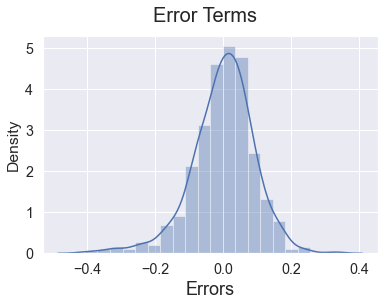

In [54]:
# Plot the histogram of the error terms
fig = plt.figure()
res = y_train - y_predict
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

Text(0.5, 0, 'Errors')

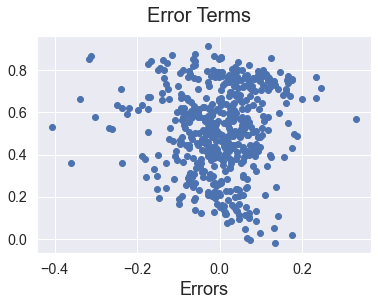

In [62]:
# Plot the histogram of the error terms
fig = plt.figure()
plt.scatter(res, y_predict)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 



###### ASSUMPTION of LINEAR REGRESSION IS VALID
1. The mean is about zero
2. Normal Distribution of error terms
3. Error terms are independent of y terms
4. Have constant variance

###### IT IS TIME TO BUILD THE EQUATION FOR PREDICTION ON TEST DATA NOW

###### Visualization of test sets

In [81]:
X_test.head(10)

,yr,holiday,temp,windspeed,mnth_9,season_2,season_4,weathersit_2,weathersit_3
184,0,1,0.831783,0.121812,0,0,0,1,0
535,1,0,0.901354,0.188468,0,1,0,0,0
299,0,0,0.511964,0.361537,0,0,1,1,0
221,0,0,0.881625,0.366681,0,0,0,0,0
152,0,0,0.817246,0.556403,0,1,0,0,0
404,1,0,0.256524,0.353856,0,0,0,0,0
198,0,0,0.856704,0.398730,0,0,0,0,0
171,0,0,0.774672,0.306415,0,0,0,1,0
512,1,1,0.814131,0.358977,0,1,0,0,0
200,0,0,0.883701,0.188478,0,0,0,0,0


In [82]:
X_test.shape

(220, 9)

In [83]:
X_test.describe()

,yr,holiday,temp,windspeed,mnth_9,season_2,season_4,weathersit_2,weathersit_3
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.558718,0.341483,0.086364,0.263636,0.236364,0.318182,0.027273
std,0.500809,0.187620,0.233187,0.153033,0.281541,0.441609,0.425817,0.466833,0.163248
min,0.000000,0.000000,0.046591,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.355429,0.231732,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.558172,0.328856,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.755981,0.427237,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,0.984424,0.815378,1.000000,1.000000,1.000000,1.000000,1.000000


In [84]:
X_train.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'mnth_9', 'season_2', 'season_4',
       'weathersit_2', 'weathersit_3'],
      dtype='object')

###### The linear equation is
cnt = 0.1325*const +0.2329*yr -0.0987xholiday + 0.548*temp - 0.1598*windspeed
      +0.1012*mnth_9 + 0.0881*season_2 + 0.1293*season_4 - 0.0784*weathersit_2 - 0.2829*weathersit_3


In [88]:
X_test_sm = sm.add_constant(X_test)

y_predict_test = lr_mdl.predict(X_test_sm)

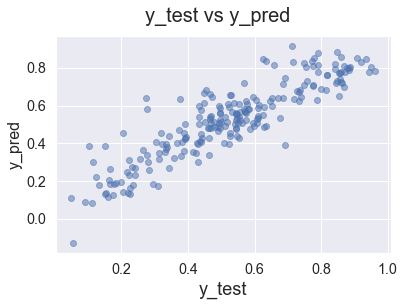

In [89]:
fig = plt.figure()
plt.scatter(y_test, y_predict_test, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)               
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

###### R2 using scikit learn on TEST DATA

In [103]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict_test)

0.7941977535477248

In [105]:
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r2 = 1-(1-r2_score(y_test, y_predict_test))*(n-1)/(n-p-1)
adjusted_r2

0.7853776572711988